In [84]:
%matplotlib inline
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [193]:
nStates = 9

edges = [[i,i+1] for i in range(nStates-1)]
edges.extend([[i+1,i] for i in range(nStates-1)])
edges.extend([[0,nStates-1],[nStates-1,0]])
#edges.extend([[2,7],[7,2]])
#edges.extend([[0,4],[4,0]])

In [194]:
adj_mtx = np.zeros([nStates,nStates])
for i in edges:
    adj_mtx[i[0],i[1]] = 1

In [203]:
def get_permutation_matrix_line(nStates):
    permutation_matrix = np.zeros([nStates,nStates])
    for i in range(9):
        #tmp = np.zeros(nStates)
        permutation_matrix[i,nStates-i-1] = 1
        #permutation_matrix[nStates-i-1,i] = 1
    return permutation_matrix

In [250]:
def get_permutation_matrix_loop(nStates):
    permutation_matrix = np.zeros([nStates,nStates])
    for i in range(9):
        #tmp = np.zeros(nStates)
        permutation_matrix[i,(i+1)%nStates] = 1
        print(i,(i+1)%nStates)
        #permutation_matrix[nStates-i-1,i] = 1
    return permutation_matrix

In [251]:
permutation_matrix = get_permutation_matrix_loop(nStates)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 0


In [253]:
G = nx.Graph()
G.ad


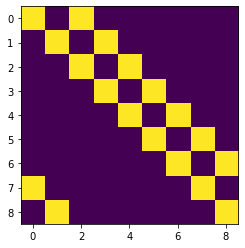

In [262]:
plt.imshow(permutation_matrix.dot(adj_mtx))

In [258]:
G = nx.from_numpy_array(permutation_matrix.dot(adj_mtx))

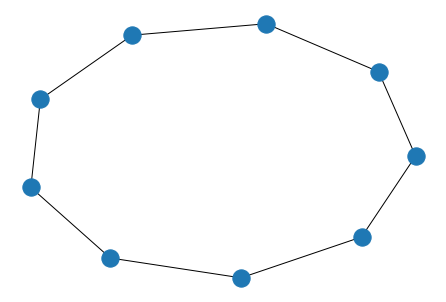

In [260]:
nx.draw(G)

In [252]:
permutation_matrix.T.dot(adj_mtx).dot(permutation_matrix)

array([[0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [246]:
permutation_matrix

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [247]:
permutation_matrix.T

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.]])

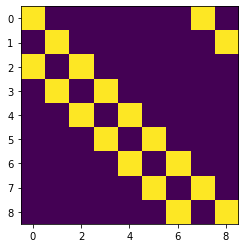

In [243]:
plt.imshow(np.dot(permutation_matrix,adj_mtx))

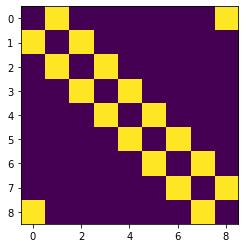

In [232]:
plt.imshow(adj_mtx)

In [263]:
evals,evecs = np.linalg.eig(permutation_matrix)

In [267]:
evecs[:,0]

array([ 0.33333333+0.j        , -0.31323087+0.11400671j,
        0.25534815-0.21426254j, -0.16666667+0.28867513j,
        0.05788273-0.32826925j,  0.05788273+0.32826925j,
       -0.16666667-0.28867513j,  0.25534815+0.21426254j,
       -0.31323087-0.11400671j])

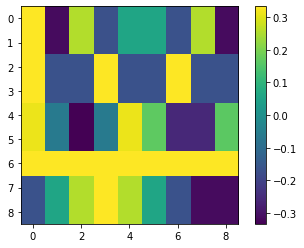

In [269]:
plt.imshow(evecs.real.T)
plt.colorbar()

In [189]:
evecs[:,4]

array([ 0.        , -0.70710678,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.70710678,  0.        ])

In [171]:
evals2,evecs2 = np.linalg.eig(np.eye(9))

In [173]:
evals2

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

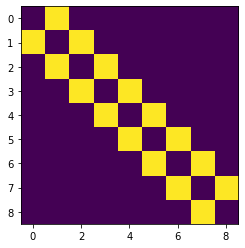

In [149]:
plt.imshow(adj_mtx)

In [180]:
A=[[0, 1],[-2, -3]]

In [182]:
evals,evecs = np.linalg.eig(A)

In [185]:
#This is the first eigenvector
evecs[:,0]

#This is the second eigenvector
evecs[:,1]

array([-0.4472136 ,  0.89442719])

In [ ]:
p

In [101]:
G = nx.Graph()
G.add_edges_from(edges)


In [102]:

is_,layout = nx.planarity.check_planarity(G)
print('planar: {}'.format(is_))

planar: True


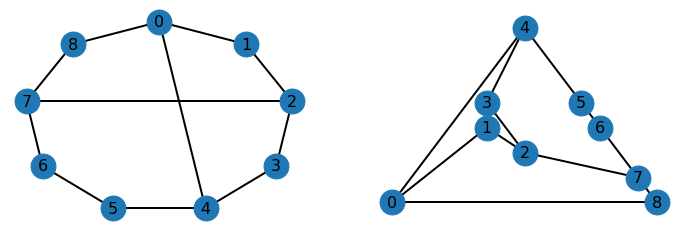

In [94]:

plt.figure(figsize=(12,4))
#pos = nx.layout.kamada_kawai_layout(G)
#nx.draw_networkx_nodes(G,pos=pos,nodelist=range(9))
ax = plt.subplot(1,2,1)
pos = {}
for i in range(9):
    pos[i] = np.array([np.sin(2*np.pi*i/9.), np.cos(2*np.pi*i/9.)])
nx.draw(G,pos=pos,node_size=620,width=2)
nx.draw_networkx_labels(G,pos,dict([(i,i) for i in range(9)]),font_size=16)

plt.subplot(1,2,2)
pos = nx.layout.planar_layout(G)
nx.draw(G,pos=pos,node_size=620,width=2)
nx.draw_networkx_labels(G,pos,dict([(i,i) for i in range(9)]),font_size=16)

print()

In [82]:
pos = {}
for i in range(9):
    pos[i] = np.array([np.sin(2*np.pi*i/9.), np.cos(2*np.pi*i/9.)])